In [51]:
%matplotlib widget
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy.optimize as optimize
from scipy.optimize import curve_fit

In [52]:
file = fits.open("/local/php23efp/raw_datasets/niriss_lsr1835/quicklook_dr/LSRJ1835+3259_box_spectra_fullres_nofcal_30.fits")
wlo = file[1].data
whi = file[2].data
wmid = 0.5*(wlo+whi)
flux = file[3].data


In [53]:
average_arr = np.mean(flux, axis=0)
print(average_arr.shape)

(2048,)


In [54]:
hdr = file[9].header
time = file[9].data
time2 = time - time[0]

In [55]:
dynamic = flux - average_arr

In [56]:
def sinusoidal_fn(x, a, b,c, d):
    return ((a*np.cos((b*x)+c)+d))
    # a = amplitude, b = 2π/period, c = phase-shift, d =  vertical-shift



In [57]:
amplitudes = np.zeros(2048)

for i in range(2048):
    params, params_covariance = curve_fit(sinusoidal_fn, time, flux[:,i], p0=[15, (2*np.pi)/0.11, 0, 1500]) 
    #Initial guesses for sine curve parameters obtained from plots of flux vs time for individual wavelengths
    amplitudes[i] = abs(params[0])

In [58]:
average_arr2 = np.mean(flux, axis = 1)


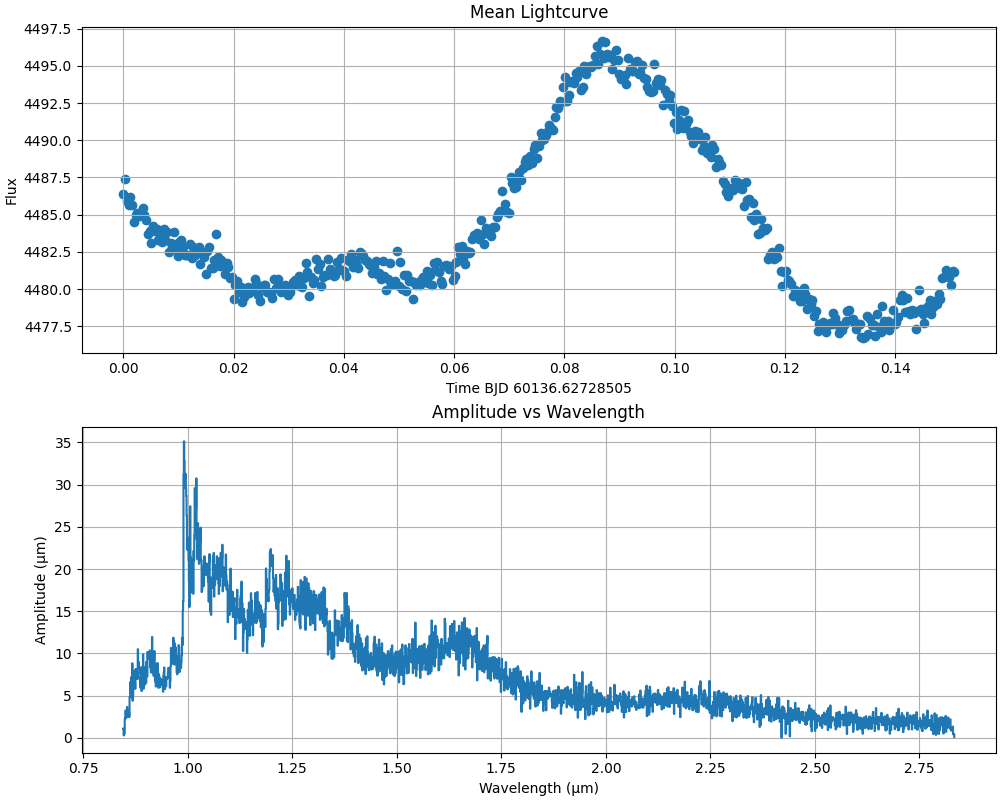

In [59]:
mosaic = """
    AA
    BB
    """
ax_dict = plt.figure(constrained_layout = True, figsize=(10, 8)).subplot_mosaic(mosaic)
plot_A = ax_dict["A"].scatter(time2, average_arr2)
ax_dict['A'].set_xlabel('Time BJD 60136.62728505')
ax_dict['A'].set_ylabel('Flux')
ax_dict['A'].set_title('Mean Lightcurve')
ax_dict["A"].grid()



plot_B =ax_dict["B"].step(wmid[1], amplitudes)
ax_dict['B'].set_xlabel('Wavelength (μm)')
ax_dict['B'].set_ylabel('Amplitude (μm)')
ax_dict['B'].set_title('Amplitude vs Wavelength')
ax_dict["B"].grid()
plt.show()

/tmp/ipykernel_1403612/843567324.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  ax_dict = plt.figure(constrained_layout = True, figsize=(10, 8)).subplot_mosaic(mosaic, sharex = True)


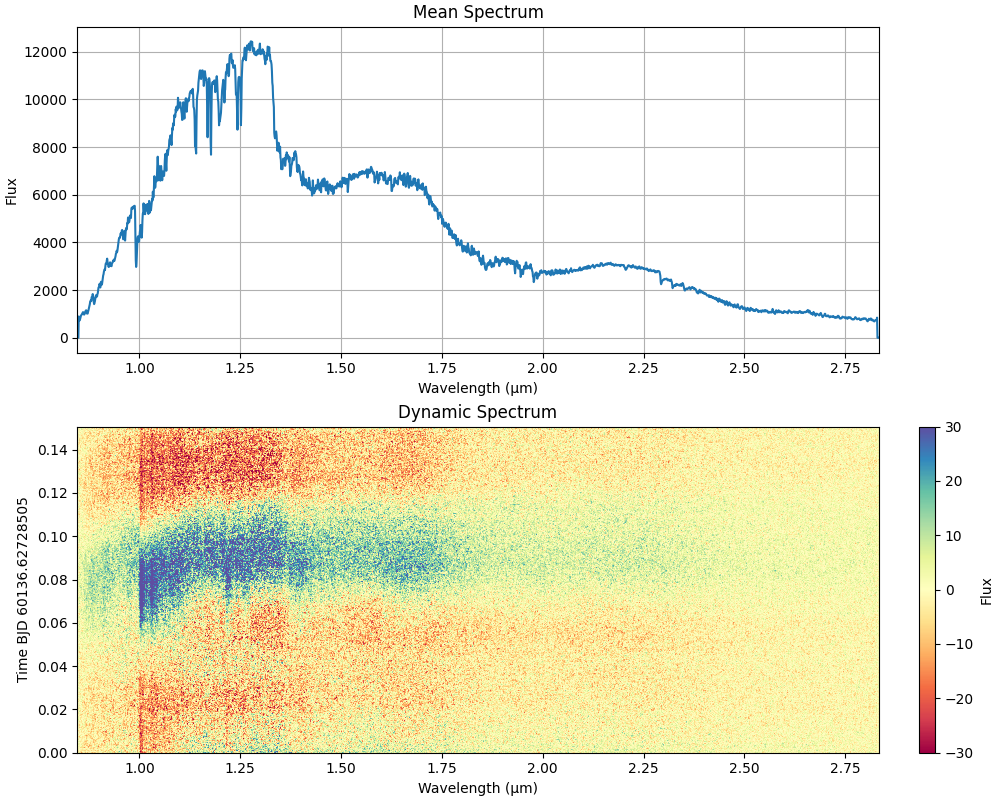

In [63]:
mosaic = """
    AA
    BB
    """
ax_dict = plt.figure(constrained_layout = True, figsize=(10, 8)).subplot_mosaic(mosaic, sharex = True)
ax_dict["A"].plot(wmid[1], average_arr)
ax_dict['A'].set_xlabel('Wavelength (μm)')
ax_dict['A'].set_ylabel('Flux')
ax_dict['A'].set_title('Mean Spectrum')
ax_dict["A"].grid()

ax_dict["A"].xaxis.set_tick_params(which='both', labelbottom=True)


dynamic_spectrum =ax_dict["B"].imshow(np.flip(dynamic), cmap='Spectral',  origin = 'upper',extent= [ wmid[1,2047],  wmid[1,0] ,  time2[0], time2[474] ],  vmin= -30, vmax = 30, aspect = 'auto')
ax_dict['B'].set_xlabel('Wavelength (μm)')
ax_dict['B'].set_ylabel('Time BJD 60136.62728505')
ax_dict['B'].set_title('Dynamic Spectrum')

plt.colorbar(dynamic_spectrum, ax = [ax_dict["B"]], label = "Flux", location = 'right')
plt.show()